The utility and main functions are designed to be executed from other scripts by importing the FukuiGrid module. 
The main functions can be run with a single-line command, and that is what we will demonstrate here. 
For this, we assume that the required input files have already been extracted and placed in their respective folders.

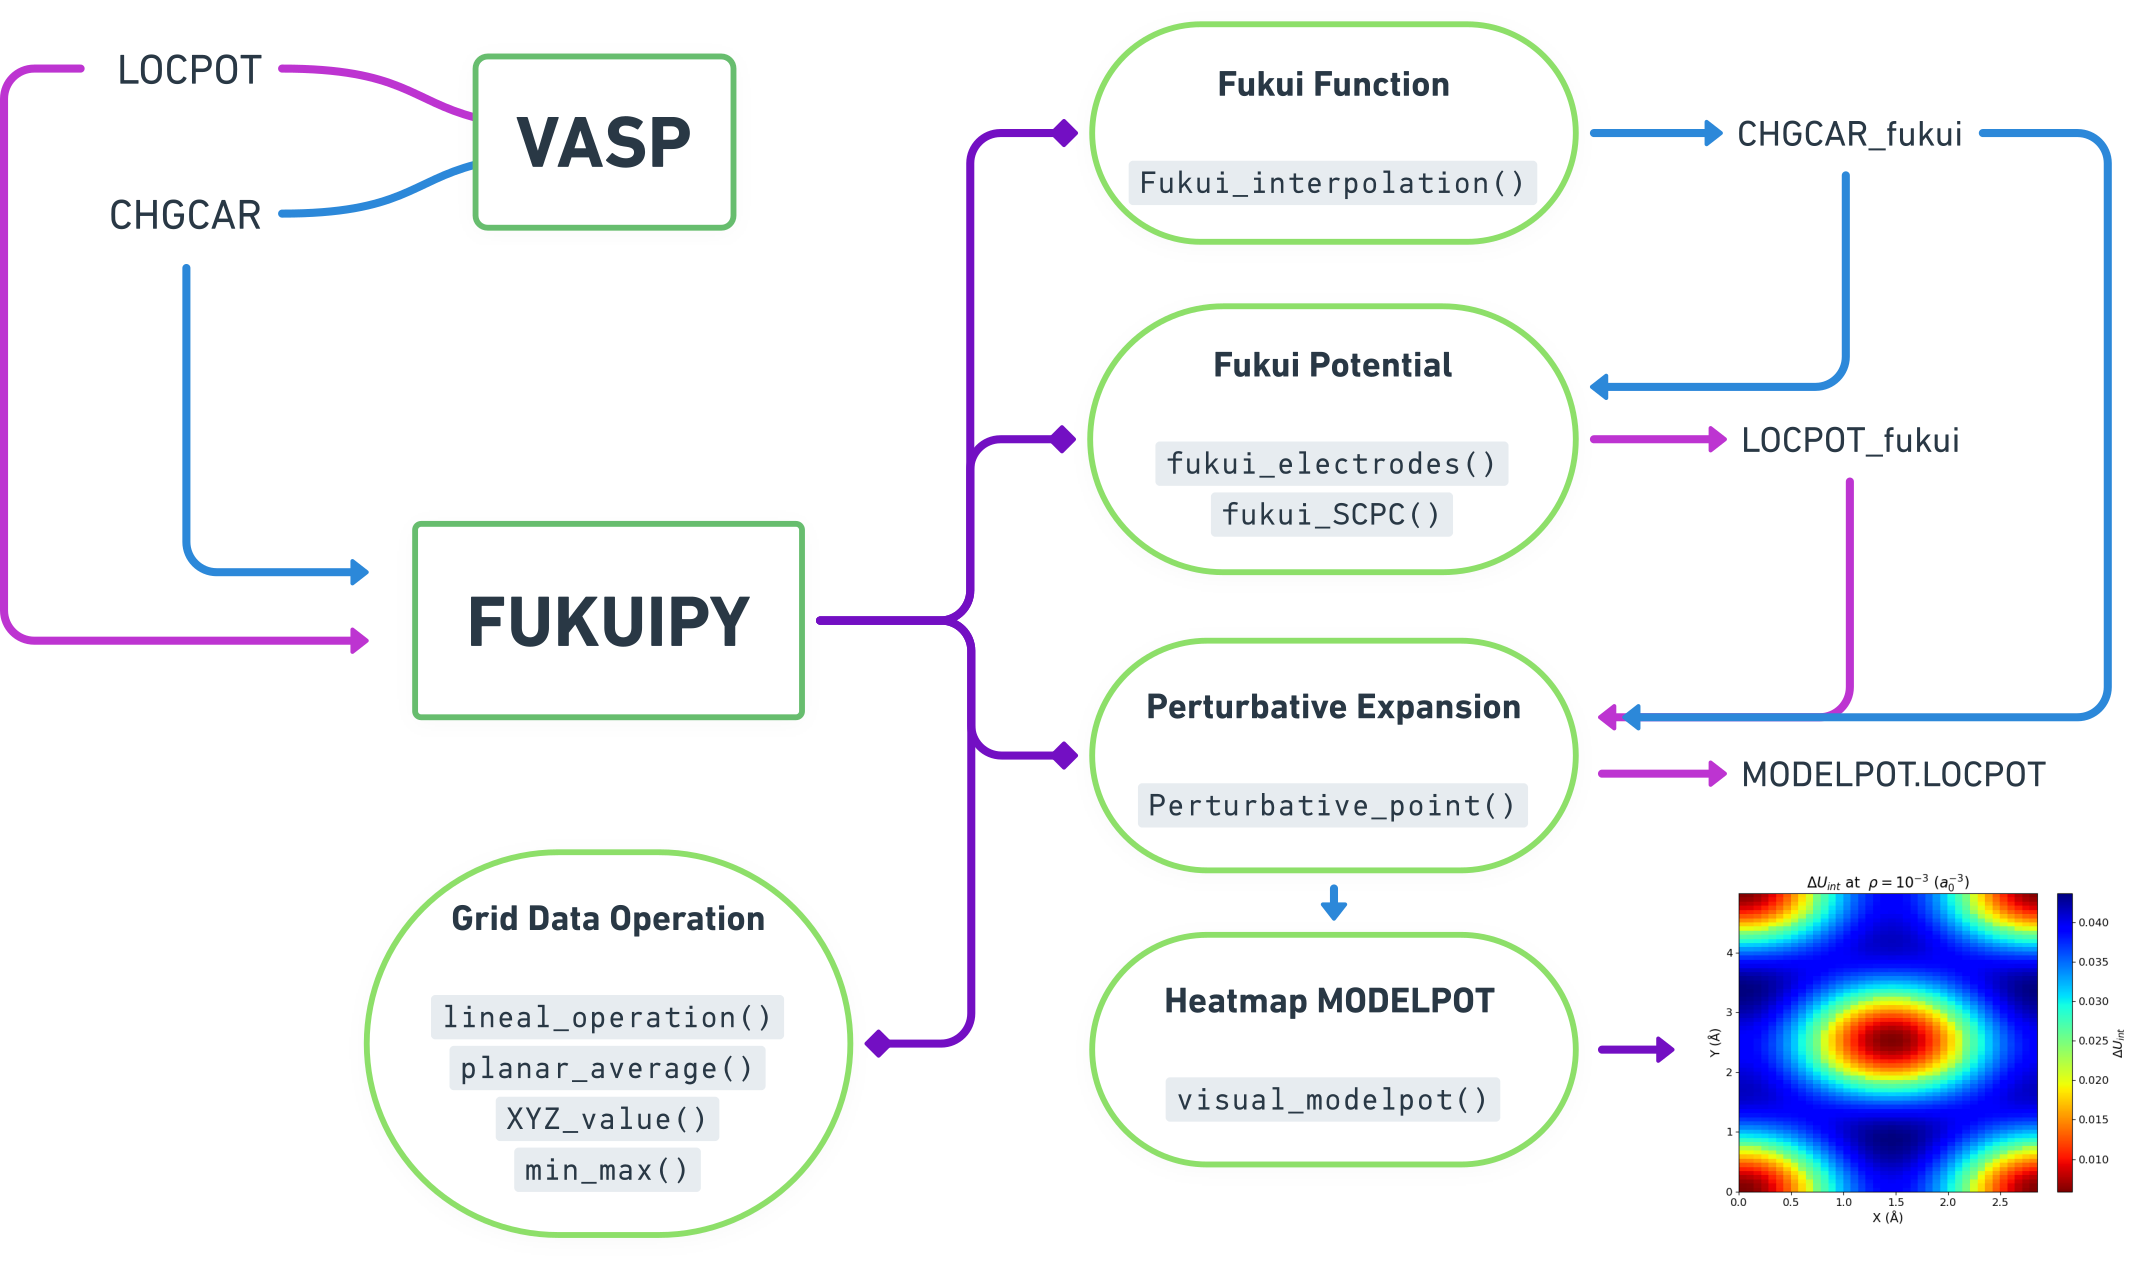

### Step 0: Import the Code
To use the configurations and handle file paths properly, we first need to import the necessary code.

In [1]:
import sys
sys.path.append('/Users/jcabezas/Documents/FukuiGrid') #path to FukuiGrid

import importlib
import FukuiGrid
from FukuiGrid import *

In [2]:
os.chdir('/Users/jcabezas/Documents/FukuiGrid/examples/Command_Line')
print("Current directory where the output files will be saved:", os.getcwd())

Current directory where the output files will be saved: /Users/jcabezas/Documents/FukuiGrid/examples/Command_Line


If you want to learn how to execute the main functions with a single-line command, you can use the `help` command. 
This will provide a description of each function’s input parameters and output files.


In [3]:
help(FukuiGrid.Perturbative_point)

Help on function Perturbative_point in module FukuiGrid:

Perturbative_point(FILE1, FILE2, q, N)
    Computes a a perturbative expansion of the energy, which is given by ΔU(r) = qΦ(r) - qΔNvf⁺⁻(r)

    Parameters:
    -----------
    FILE1 : str
        Path to the LOCPOT file with Electrostatic potential
    FILE2 : str
        Path to the LOCPOT file with Fukui potential vf⁺⁻(r).
    q : float
        Charge of active site.
    N : float
        Change in the number of electrons ΔN

    Returns:
    --------
    final_file : str
        Path to the output file containing the computed perturbative model potential in VASP format.

    Notes:
    ------
    - The charge density grids in the two input files must have the same dimensions.
    - The output potential is written in VASP format as 'MODELPOT.LOCPOT'.
    - The function assumes the grids are orthogonal, and the file format is consistent with standard VASP charge density files.

    Example:
    --------
    ```
    final_file =


Let's proceed with some examples.


### Fukui Function Interpolation: ±
We will recreate the Hands-On tutorial: **FukuiGrid - Fukui Functions f−(r) by Interpolation** 
for a **TiC (001) Surface**.

In [4]:
TiC_CHGCAR_00= '../Interpolation/fukui-/CHGCAR_00'
TiC_CHGCAR_005= '../Interpolation/fukui-/CHGCAR-005'
TiC_CHGCAR_010= '../Interpolation/fukui-/CHGCAR-010'
TiC_CHGCAR_015= '../Interpolation/fukui-/CHGCAR-015'
dn=[-0.15, -0.1, -0.05, 0]

FukuiGrid.Fukui_interpolation(TiC_CHGCAR_015,TiC_CHGCAR_010,TiC_CHGCAR_005,TiC_CHGCAR_00,dn)

\delta N is:  [-0.15, -0.1, -0.05, 0]
Reading info from files
NATOMS =  28 GRID =  [56, 56, 560] POINTS =  1756160
CHG1 [0.00120131 0.00145714 0.00216061 ... 0.00533315 0.00530239 0.00528347]
CHG2 [-0.00043171 -0.0001955   0.00045052 ...  0.00334166  0.00335388
  0.00336294]
CHG3 [0.00182575 0.00201794 0.00253443 ... 0.00475035 0.00486216 0.0049355 ]
CHG4 [0.00080604 0.00106001 0.00175562 ... 0.00482119 0.0047996  0.00478467]
Performing interpolation
Fukui size 1756160
Fukui [ 2.14330399e-03  2.04405441e-03  1.73786612e-03 ... -2.54390781e-04
 -1.59391000e-07  1.52285329e-04]
file saved:  CHGCAR_FUKUI.vasp
FUKUI file was written CHGCAR_FUKUI.vasp



'CHGCAR_FUKUI.vasp'

Now we will recreate the Hands-On tutorial: **FukuiGrid - Fukui Functions f+(r) by Interpolation** 
for a **ZrC (001) Surface**.

In [5]:
dn=[0, 0.05, 0.1, 0.15]
ZrC_CHGCAR_00='../Interpolation/fukui+/CHGCAR_00'
ZrC_CHGCAR_005='../Interpolation/fukui+/CHGCAR+005'
ZrC_CHGCAR_010='../Interpolation/fukui+/CHGCAR+010'
ZrC_CHGCAR_015='../Interpolation/fukui+/CHGCAR+015'
Fukui_interpolation(ZrC_CHGCAR_00,ZrC_CHGCAR_005, ZrC_CHGCAR_010, ZrC_CHGCAR_015,dn)

\delta N is:  [0, 0.05, 0.1, 0.15]
Reading info from files
NATOMS =  28 GRID =  [64, 64, 576] POINTS =  2359296
CHG1 [0.00202806 0.00193717 0.00168132 ... 0.00014221 0.00014476 0.00014706]
CHG2 [0.00227238 0.00218357 0.00193262 ... 0.00040139 0.00040229 0.00040264]
CHG3 [ 0.00111566  0.00102652  0.0007747  ... -0.00075699 -0.00075543
 -0.00075457]
CHG4 [ 0.0005062   0.00041782  0.00016828 ... -0.00134822 -0.00134827
 -0.0013484 ]
Performing interpolation
Fukui size 2359296
Fukui [-0.01144456 -0.01143015 -0.01139405 ... -0.01125937 -0.01127363
 -0.01128718]
file saved:  CHGCAR_FUKUI.vasp
FUKUI file was written CHGCAR_FUKUI.vasp



'CHGCAR_FUKUI.vasp'

### Fukui Potential Calculation:
There are two methods to compute the Fukui potential: **Electrode-based** and **SCPC-based**. 
Both methods generate the file `LOCPOT_fukui.vasp` and a graphical representation of how the potential behaves.


NATOMS =  42 GRID =  [40, 96, 700] POINTS =  2688000
This will take a few seconds.

file saved:  LOCPOT_FUKUI.vasp


'LOCPOT_FUKUI.vasp'

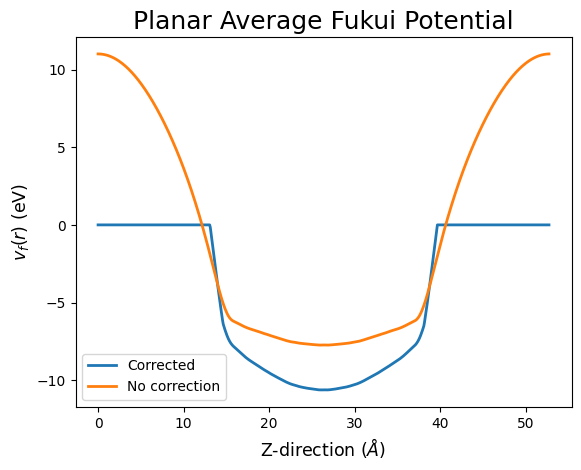

In [6]:
#help(fukui_electrodes)
TiO2_CHGCAR = '../Potential_electrodes/CHGCAR_00' 
TiO2_CHGCAR_fukui = '../Potential_electrodes/CHGCAR'
d_constant= 7.34

fukui_electrodes(TiO2_CHGCAR, TiO2_CHGCAR_fukui,d_constant)


NATOMS =  42 GRID =  [40, 96, 700] POINTS =  2688000
This will take a few seconds.

value2_interp= [ 15.12151953  15.12095623  15.11947939  15.11708475  15.11376809
  15.10952599  15.10435562  15.09825451  15.09122045  15.08325155
  15.07434611  15.0645026   15.05371969  15.04199618  15.02933098
  15.01572314  15.00117178  14.98567611  14.96923543  14.95184912
  14.9335166   14.91423735  14.89401092  14.8728369   14.85071491
  14.82764463  14.80362574  14.77865799  14.75274114  14.72587497
  14.69805931  14.66929397  14.63957882  14.60891374  14.5772986
  14.54473331  14.5112178   14.47675199  14.44133583  14.40496927
  14.36765227  14.32938479  14.29016683  14.24999838  14.20887942
  14.16680994  14.12378997  14.07981951  14.03489858  13.98902719
  13.94220537  13.89443316  13.84571058  13.79603766  13.74541444
  13.69384098  13.6413173   13.58784344  13.53341948  13.47804544
  13.42172138  13.36444735  13.3062234   13.2470496   13.18692599
  13.12585263  13.06382958  13.0008569   12.

'LOCPOT_FUKUI.vasp'

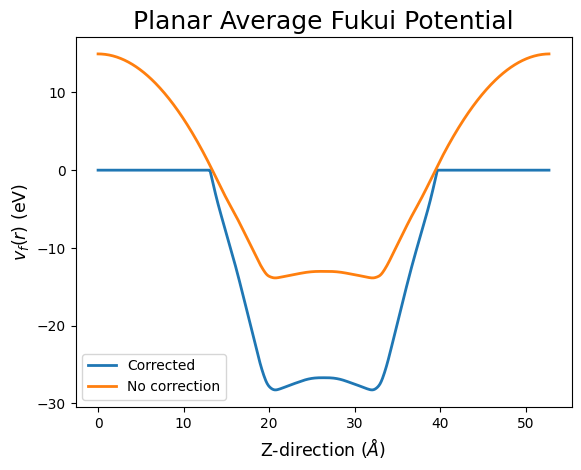

In [7]:
#help(fukui_SCPC)
TiO2_CHGCAR = '../Potential_electrodes/CHGCAR_00' 
TiO2_CHGCAR_fukui_plus = '../Potential_SCPC/CHGCAR'
TiO2_zvcor = '../Potential_SCPC/z-vcor.dat'

fukui_SCPC(TiO2_CHGCAR, TiO2_CHGCAR_fukui_plus,TiO2_zvcor,1)

### Perturbative expansion:

In [8]:
#help(Perturbative_point)
TiO2_LOCPOT='../Perturbative_expansion/FUKUI.LOCPOT'
TiO2_LOCPOT_00='../Perturbative_expansion/LOCPOT_00'


MODELPOT=Perturbative_point(TiO2_LOCPOT_00, TiO2_LOCPOT, q=-0.1, N=0.2)

print(MODELPOT)

FILE1:  ../Perturbative_expansion/LOCPOT_00
NATOMS =  42 GRID =  [40, 96, 700] POINTS =  2688000
FILE2:  ../Perturbative_expansion/FUKUI.LOCPOT
NATOMS =  42 GRID =  [40, 96, 700] POINTS =  2688000
CHG1 [3.90063829 3.90064525 3.9005666  ... 3.90059948 3.90023414 3.90023915]
CHG2 [5.93164781e-07 5.94813628e-07 5.98812385e-07 ... 6.05696339e-07
 6.03478394e-07 6.01434078e-07]

Just a few seconds.
file saved:  MODELPOT_LOCPOT.vasp
MODELPOT_LOCPOT.vasp


We can also visualize the previous **MODEL_LOCPOT.vasp** file. When executing the **pipeline** command, this option is only available for the newly created file using the perturbative method. However, by using the appropriate command, we can generate it for any file. 

There is also the option to visualize it either as an **isosurface of the density** or for a **specific z-value**.


In [9]:
help(visual_modelpot)


Help on function visual_modelpot in module FukuiGrid:

visual_modelpot(file1, file2, z=None, dz=None)
    Plot heatmap with respect to the X and Y distance, and a color bar is added to indicate the energy
    difference (`ΔU_int`). The heatmap can be generated either for a selected z-plane or an isosurface.

    Parameters:
    -----------
    file1 : str
        Path to the input file containing the charge density data of the neutral slab (e.g., CHGCAR) in VASP format.
    file2 : str
        Path to the input file containing the energy obtained by perturbative expansion (e.g., MODELPOT or LOCPOT) in VASP format.
    z : float, optional
        The specific z-plane value to generate a 2D heatmap at that height. If not provided, the heatmap is based on an isosurface.
    dz : float, optional
        Thickness around the given z value (z ± dz) to include more data points when generating the heatmap for a specific plane.
        Only used when `z` is provided.

    Returns:
    --------


For a **density isosurface**, we need to load the density file, which in this case is **TiO₂_CHGCAR**.  

In addition to generating the **plot** and the **heatmap data**, this process also outputs the **CHGCAR** and **LOCPOT** files in **XYZ format**.

File to convert to xyz format:  /Users/jcabezas/Documents/FukuiGrid/examples/Command_Line/MODELPOT_LOCPOT.vasp
NATOMS =  42 GRID =  [40, 96, 700] POINTS =  2688000
NATOMS =  42 GRID =  [40, 96, 700] POINTS =  2688000
File to convert to xyz format:  ../Potential_electrodes/CHGCAR_00
NATOMS =  42 GRID =  [40, 96, 700] POINTS =  2688000
The columns are the same between the files.
Number of data filtered in MODELPOT file: 3840


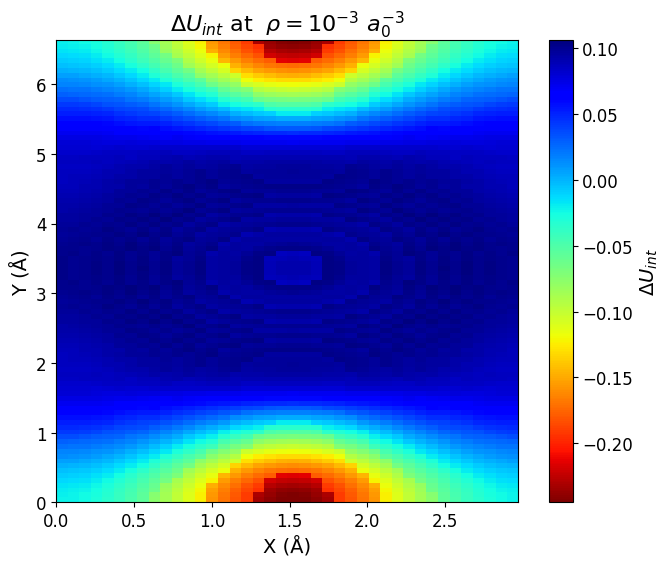

[(1.2954, 0.0, 38.036, -0.232645407),
 (1.3716, 0.0, 38.036, -0.239401776),
 (1.4478, 0.0, 38.036, -0.243639178),
 (1.524, 0.0, 38.036, -0.244780962),
 (1.6002, 0.0, 38.036, -0.243639178),
 (1.6764, 0.0, 38.036, -0.239401776),
 (1.7526, 0.0, 38.036, -0.232645407),
 (1.2954, 0.0698, 38.036, -0.229817587),
 (1.3716, 0.0698, 38.036, -0.237519916),
 (1.4478, 0.0698, 38.036, -0.242490047),
 (1.524, 0.0698, 38.036, -0.244153774),
 (1.6002, 0.0698, 38.036, -0.242490047),
 (1.6764, 0.0698, 38.036, -0.237519916),
 (1.7526, 0.0698, 38.036, -0.229817587),
 (1.3716, 0.1396, 38.036, -0.234211171),
 (1.4478, 0.1396, 38.036, -0.238382276),
 (1.524, 0.1396, 38.036, -0.239573104),
 (1.6002, 0.1396, 38.036, -0.238382276),
 (1.6764, 0.1396, 38.036, -0.234211171),
 (1.3716, 0.2094, 38.036, -0.227373688),
 (1.4478, 0.2094, 38.036, -0.23204373),
 (1.524, 0.2094, 38.036, -0.233805631),
 (1.6002, 0.2094, 38.036, -0.23204373),
 (1.6764, 0.2094, 38.036, -0.227373688),
 (1.4478, 0.2792, 38.036, -0.223279911),
 (

In [10]:

MODELPOT_file = os.path.abspath(MODELPOT)
#For this calculation, we will use the previously loaded density file TiO2_CHGCAR
# from '../Potential_electrodes/CHGCAR_00'. 
# This file will be used to match the density isosurface.

visual_modelpot(TiO2_CHGCAR,MODELPOT_file) 

On the other hand, if you want to visualize the data for a specific **z-value** with a window **dz**, you can execute the following command:  

Note that in this case, the corresponding **CHGCAR** of the system is not required—only the one we are interested in plotting.

File to convert to xyz format:  /Users/jcabezas/Documents/FukuiGrid/examples/Command_Line/MODELPOT_LOCPOT.vasp
NATOMS =  42 GRID =  [40, 96, 700] POINTS =  2688000
NATOMS =  42 GRID =  [40, 96, 700] POINTS =  2688000


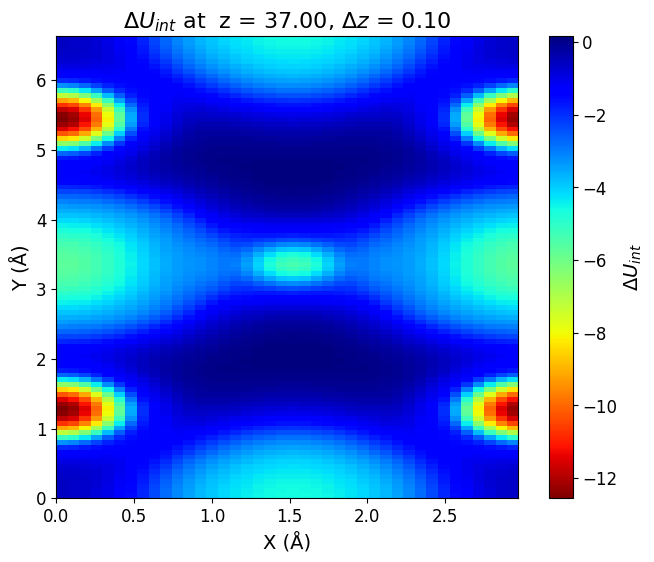

array([[ 0.        ,  0.        , 36.9062    , -0.23041313],
       [ 0.0762    ,  0.        , 36.9062    , -0.24023207],
       [ 0.1524    ,  0.        , 36.9062    , -0.27019534],
       ...,
       [ 2.8194    ,  6.6305    , 37.0568    , -0.24365528],
       [ 2.8956    ,  6.6305    , 37.0568    , -0.20907583],
       [ 2.9718    ,  6.6305    , 37.0568    , -0.18670086]])

In [11]:
visual_modelpot('',MODELPOT_file,z=37,dz=0.1)

### Grid Data Operation

We also test the **min_max() function**, just as an example. However, we can also execute **linear_operation**, **planar_average**, and **XYZvalue**.  

In any case, refer to the **help** command for more details.

In [12]:
FukuiGrid.min_max(MODELPOT_file,'max',POSCAR_format=True)

NATOMS =  42 GRID =  [40, 96, 700] POINTS =  2688000
Data successfully written to max.txt
file saved:  max_POSCAR.vasp


('max.txt',
 [array([ 1.14299625e+00,  2.09384594e-01, -7.53187729e-02,  9.24204819e-05]),
  array([ 1.75259425e+00,  2.09384594e-01, -7.53187729e-02,  9.24204819e-05]),
  array([ 1.52399500e-01,  1.04692297e+00, -7.53187729e-02,  1.05194730e-04]),
  array([ 2.74319100e+00,  1.04692297e+00, -7.53187729e-02,  1.05194730e-04]),
  array([ 1.52399500e-01,  5.51379430e+00, -7.53187729e-02,  1.05194730e-04]),
  array([ 2.74319100e+00,  5.51379430e+00, -7.53187729e-02,  1.05194730e-04]),
  array([ 1.14299625e+00,  6.35133268e+00, -7.53187729e-02,  9.24204819e-05]),
  array([ 1.75259425e+00,  6.35133268e+00, -7.53187729e-02,  9.24204819e-05]),
  array([-7.61997500e-02,  3.07097404e+00,  7.53187729e-02,  6.53194881e-05]),
  array([-7.61997500e-02,  3.48974323e+00,  7.53187729e-02,  6.53194881e-05]),
  array([2.28599250e-01, 5.58358917e-01, 1.50637546e-01, 4.85309838e-05]),
  array([2.66699125e+00, 5.58358917e-01, 1.50637546e-01, 4.85309838e-05]),
  array([-7.61997500e-02,  2.58240999e+00,  1.50